In [1]:
import cv2
import numpy as np

img = cv2.imread('sIMG_2180.jpg')
res = cv2.resize(img,None,fx=20, fy=20, interpolation = cv2.INTER_NEAREST)
#OR
# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

In [2]:
res.shape[0]

15360

In [3]:
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
cv2.namedWindow('res', cv2.WINDOW_AUTOSIZE)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
cv2.imwrite('output20N.jpg',res)

True

In [5]:
# translate
import cv2
import numpy as np

In [6]:
img = cv2.imread('ml.jpg', 0)
rows,cols = img.shape

In [7]:
x = 50
y = 100

In [8]:
M = np.float32([[1,0,y], [0,1,x]])

In [9]:
M

array([[  1.,   0., 100.],
       [  0.,   1.,  50.]], dtype=float32)

In [10]:
dst = cv2.warpAffine(img, M, (cols*2,rows*2))

In [11]:
dst = cv2.line(dst, (0,0), (y,x),(255,0,0),1)
cv2.imshow('img',dst)

In [12]:
# rotation

In [13]:
import cv2
import numpy as np

img = cv2.imread('ml.jpg', 0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),120,1)
print(M)

[[ -0.5          0.8660254   41.74682453]
 [ -0.8660254   -0.5        274.10254038]]


In [14]:
M = cv2.getRotationMatrix2D((0,0),45,1)
print(M)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


In [15]:
dst = cv2.warpAffine(img,M,(cols,rows))

In [16]:
cv2.imshow('oimg', img)
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

img = cv2.imread('ml.jpg', 0)
rows,cols = img.shape


# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)
        
# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t += 1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [18]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        cv2.circle(img,(x,y),5,(0,255,0),2)

# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
t = 0
while(1):
    t+=1
    M = cv2.getRotationMatrix2D((cols/2,rows/2),t%360,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [19]:
# Affine Transform

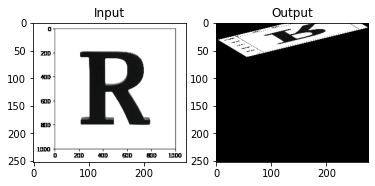

In [20]:
from matplotlib import pyplot as plt

img = cv2.imread('letterR_opencv.png')
rows,cols,ch = img.shape
pts1 = np.float32([[40,10],[257,10],[40,228]])
pts2 = np.float32([[85,52],[257,10],[40,25]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [21]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# mouse callback function
mousex = 0 
mousey = 0
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_MOUSEMOVE:
        mousex = x
        mousey = y
        cv2.circle(dst,(x,y),5,(0,255,0),2)
        
# Create a black image, a window and bind the function to window
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    pts2 = np.float32([[mousex,mousey],[257,10],[40,228]])
    print(mousex, mousey)
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [22]:
# perspective Transfromation

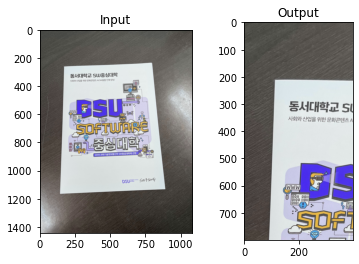

In [23]:
img = cv2.imread('perspective.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[86,128],[376,114],[442,564],[68,582]])
pts2 = np.float32([[0,0],[400,0],[400,600],[0,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,800))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

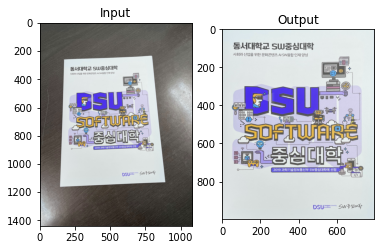

In [24]:
img = cv2.imread('perspective.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[169,256],[793,235],[140,1161],[884,1128]])
pts2 = np.float32([[0,0],[800,0],[0,1000],[800,1000]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(800,1000))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

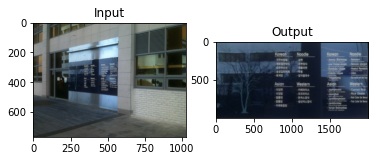

In [25]:
img = cv2.imread('dsu4.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[238,269],[569,233],[238,456],[565,491]])
pts2 = np.float32([[0,0],[2000,0],[0,1000],[2000,1000]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(2000,1000))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()